In [42]:
import pandas as pd
import numpy as np

In [43]:
data = pd.read_csv("Predict Price of Airline Tickets.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [44]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder() # handle_unknown='ignore'

#perform one-hot encoding on 'team' column 
encode_column = pd.DataFrame(encoder.fit_transform(data[['Airline','Source','Destination','Route','Total_Stops']]).toarray())
encode_column

,0,1,2,3,4,5,6,7,8,9,...,148,149,150,151,152,153,154,155,156,157
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# data.info()

data.head(5)


le = preprocessing.LabelEncoder()
# data['Outlook'] = le.fit_transform(data.Outlook.values)

data = data.apply(le.fit_transform)

x = data.drop(['Price'],axis=1)
y = data['Price']

xx = np.array(x)
yy = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.33, random_state=42)

In [56]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import tree

regressor = RandomForestRegressor(n_estimators=50, max_depth=10) #max_depth=3

regressor.fit(x_train,y_train)


# tree_graph = tree(regressor)

RandomForestRegressor(max_depth=10, n_estimators=50)

In [57]:
from sklearn import metrics

y_pred = regressor.predict(x_test)
y_test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 133.75286851798765
Mean Squared Error: 39797.3594336199
Root Mean Squared Error: 199.49275534119002
Mean Absolute Error: 0.8762399307548863


In [58]:
from sklearn.tree import export_text
from sklearn import tree
# x.columns
columns_name = ['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Price']

for tree_in_forest in regressor.estimators_:
  text_representation = export_text(tree_in_forest,feature_names=columns_name)
  print(text_representation)


|--- Total_Stops <= 3.50
|   |--- Airline <= 3.50
|   |   |--- Total_Stops <= 0.50
|   |   |   |--- Airline <= 1.50
|   |   |   |   |--- Date_of_Journey <= 4.50
|   |   |   |   |   |--- Route <= 26.00
|   |   |   |   |   |   |--- Route <= 16.00
|   |   |   |   |   |   |   |--- Date_of_Journey <= 0.50
|   |   |   |   |   |   |   |   |--- Arrival_Time <= 1240.00
|   |   |   |   |   |   |   |   |   |--- value: [1607.00]
|   |   |   |   |   |   |   |   |--- Arrival_Time >  1240.00
|   |   |   |   |   |   |   |   |   |--- value: [1556.00]
|   |   |   |   |   |   |   |--- Date_of_Journey >  0.50
|   |   |   |   |   |   |   |   |--- Duration <= 236.00
|   |   |   |   |   |   |   |   |   |--- Dep_Time <= 51.00
|   |   |   |   |   |   |   |   |   |   |--- value: [1078.00]
|   |   |   |   |   |   |   |   |   |--- Dep_Time >  51.00
|   |   |   |   |   |   |   |   |   |   |--- value: [1181.00]
|   |   |   |   |   |   |   |   |--- Duration >  236.00
|   |   |   |   |   |   |   |   |   |--- Duration

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [65]:
import matplotlib.pyplot as plt

import graphviz
# DOT data
i_tree =0
for tree_in_forest in regressor.estimators_:

    dot_data = tree.export_graphviz(tree_in_forest, out_file=None, 
                                    feature_names=x.columns,  
                      #  class_names=['Golf Players'],
                                    filled=True, rounded=True)

    # Draw graph
    graph = graphviz.Source(dot_data, format="png") 
    graph



graph.render('tree',format='png', view=True)

ModuleNotFoundError: No module named 'graphviz'

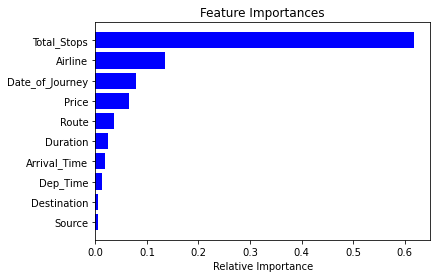

In [66]:
features = columns_name
importances = regressor.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
# model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(regressor, x, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('mean_squared_error',np.mean(np.absolute(scores)))

mean_squared_error 40137.54854694342


In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None],
              'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1,
                           verbose = 0, return_train_score=True)

g_search.fit(x_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}
